<a href="https://colab.research.google.com/github/skmahin661/AI_guessing_Game/blob/main/XGboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving cleaned_dataset_no_duplicates_no_missing.csv to cleaned_dataset_no_duplicates_no_missing.csv
Columns in dataset: ['id', 'Sex(M/F)', 'Age(year)', 'Height(cm)', 'Weight(kg)', 'Diastolic Blood Pressure(mmHg)', 'Heart Rate(b/m)', 'BMI(kg/m^2)', 'Hypertension', 'DatasetType']
   id Sex(M/F)  Age(year)  Height(cm) Weight(kg)  \
0   2   Female        -45       152.0         63   
1   6   Female         47       150.0     JJJJJJ   
2   8     Male         45       172.0         65   
3   9   Female         46       155.0         65   
4  10   Female         48       160.0         68   

   Diastolic Blood Pressure(mmHg)  Heart Rate(b/m)  BMI(kg/m^2)  \
0                              89               97        27.27   
1                              71               79        20.89   
2                              93               87        21.97   
3                              73               73        27.06   
4                              62               70        26.56   

     

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:01:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:01:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:01:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:01:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:01:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-validation accuracies: [0.55263158 0.65789474 0.5        0.56756757 0.7027027 ]
Mean CV accuracy: 0.5962


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:01:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy on full data: 0.9947

Classification Report (Full Data):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        70
           1       0.99      1.00      0.99        75
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        14

    accuracy                           0.99       188
   macro avg       1.00      1.00      1.00       188
weighted avg       0.99      0.99      0.99       188



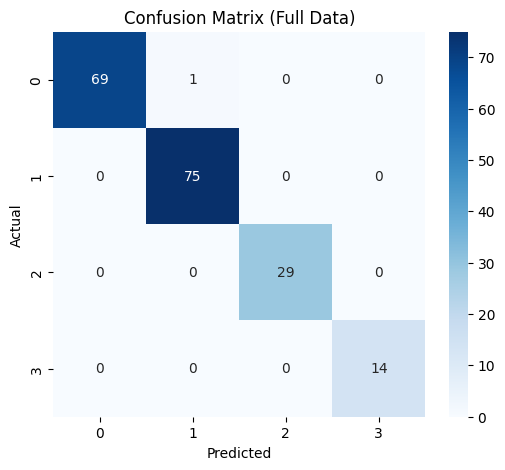

<ipython-input-1-35d625aa6149>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f'Fold {i+1}' for i in range(len(cv_scores))], y=cv_scores, palette='pastel')


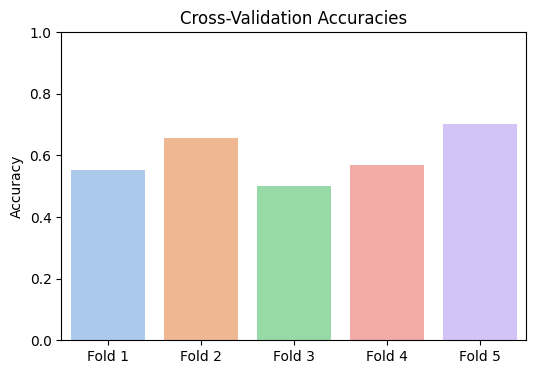

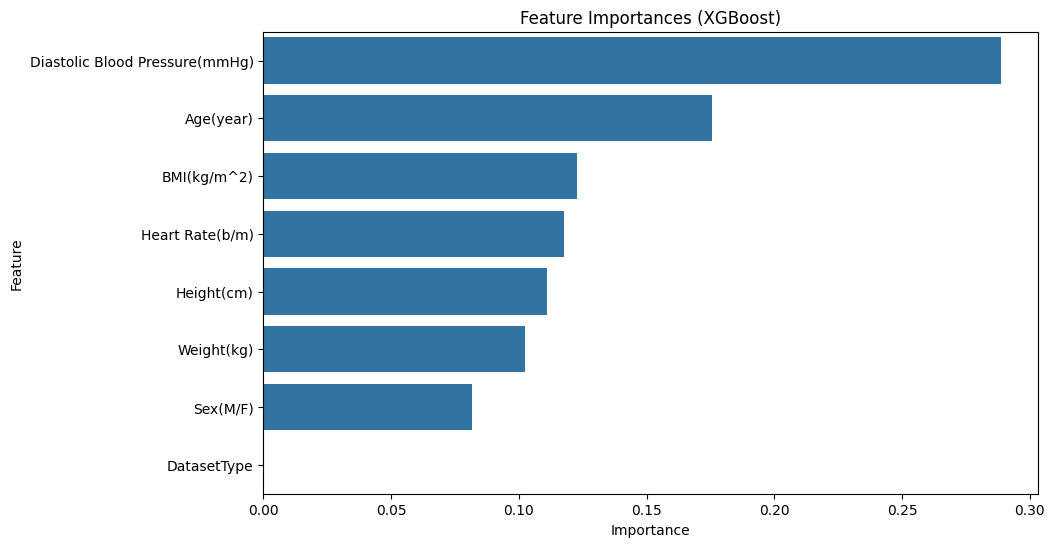

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files
import xgboost as xgb

# Step 2: Upload CSV
uploaded = files.upload()

# Step 3: Load CSV
filename = next(iter(uploaded))
df = pd.read_csv(filename)

print("Columns in dataset:", df.columns.tolist())
print(df.head())

# Step 4: Define target and drop unnecessary columns
target_column = 'Hypertension'
if 'id' in df.columns:
    df = df.drop(['id'], axis=1)

# Step 5: Handle missing values
print("Missing values per column:\n", df.isnull().sum())
df = df.dropna()

# Step 6: Encode categorical features except target
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    if col != target_column:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Step 7: Encode target labels
target_le = LabelEncoder()
df[target_column] = target_le.fit_transform(df[target_column])
print("Target classes mapping:", dict(zip(target_le.classes_, target_le.transform(target_le.classes_))))

# Step 8: Split features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

# Step 9: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 10: Define XGBoost model with overfitting-reducing params
model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1,
    reg_lambda=1,
    random_state=42
)

# Step 11: Stratified 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')

print(f"Cross-validation accuracies: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")

# Step 12: Train model on full dataset
model.fit(X_scaled, y)

# Step 13: Predict on full dataset to show performance (optional)
y_pred = model.predict(X_scaled)
train_acc = accuracy_score(y, y_pred)
print(f"Training Accuracy on full data: {train_acc:.4f}")

print("\nClassification Report (Full Data):")
print(classification_report(y, y_pred))

cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Full Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 14: Plot CV accuracies
plt.figure(figsize=(6,4))
sns.barplot(x=[f'Fold {i+1}' for i in range(len(cv_scores))], y=cv_scores, palette='pastel')
plt.ylim(0,1)
plt.title('Cross-Validation Accuracies')
plt.ylabel('Accuracy')
plt.show()

# Step 15: Plot feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
